In [1]:
using DataFrames
using Distributions
using PyPlot

In [2]:
df = DataFrame(
id = [1],
localetype=[3],
totalpop=[50000],
demos_1_unexposed = [12500]   ,
demos_1_exposed  = [0]  ,
demos_2_unexposed = [13000],
demos_2_exposed = [0],
demos_3_unexposed = [13000],
demos_3_exposed   =[0] ,
demos_4_unexposed    =  [7500],
demos_4_exposed    = [0],
demos_5_unexposed   = [4000], 
demos_5_exposed    = [0]
)

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [3]:
sum(df[1,4:13])

50000

In [4]:
df

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [5]:
foo = Matrix(df)

1×13 Array{Int64,2}:
 1  3  50000  12500  0  13000  0  13000  0  7500  0  4000  0

In [6]:
foo'

13×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
     1
     3
 50000
 12500
     0
 13000
     0
 13000
     0
  7500
     0
  4000
     0

### Figuring out what distribution and paramaters to use; how to apply to events

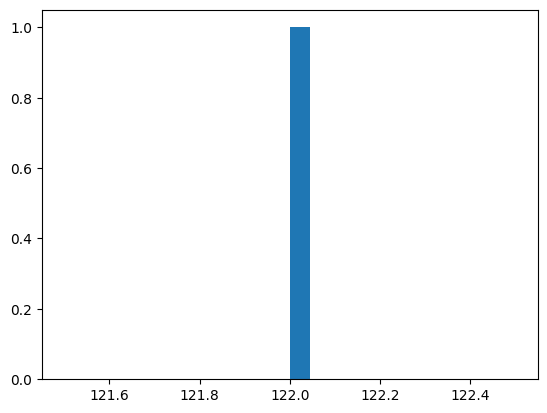

122.0


In [10]:
dbin = Binomial(1000,0.1)
x = rand(dbin);
println(mean(x))
hist(x,22);

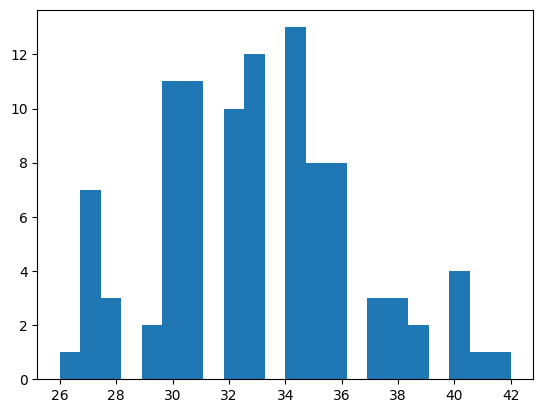

33.0


([1.0, 7.0, 3.0, 0.0, 2.0, 11.0, 11.0, 0.0, 10.0, 12.0  …  8.0, 8.0, 0.0, 3.0, 3.0, 2.0, 0.0, 4.0, 1.0, 1.0], [26.0, 26.727272727272727, 27.454545454545453, 28.18181818181818, 28.90909090909091, 29.636363636363637, 30.363636363636363, 31.09090909090909, 31.81818181818182, 32.54545454545455  …  35.45454545454545, 36.18181818181818, 36.90909090909091, 37.63636363636364, 38.36363636363636, 39.09090909090909, 39.81818181818182, 40.54545454545455, 41.27272727272727, 42.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x13a316df0>, PyObject <matplotlib.patches.Rectangle object at 0x13a316c10>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9310>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e95e0>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e98b0>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9b80>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9e50>, PyObject <matplotlib.patches.Rectangle object at 0x13a2fe160>, PyObjec

In [90]:
dhypergeo = Hypergeometric(100,200,100) # successes, failures, draws
x = rand(dhypergeo,100)
println(mean(x))
hist(x,22)

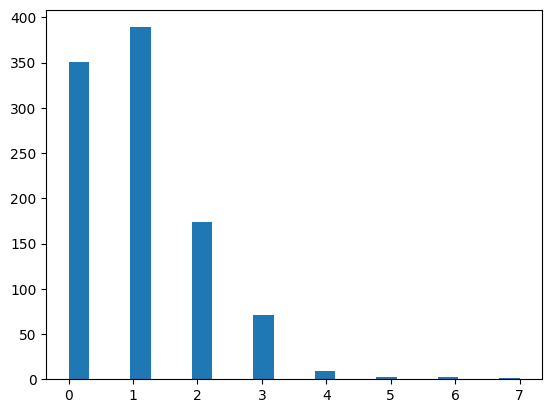

1.02


In [38]:
dpoiss = Poisson(1)
x = rand(dpoiss, 1000)
println(mean(x))
hist(x,22);

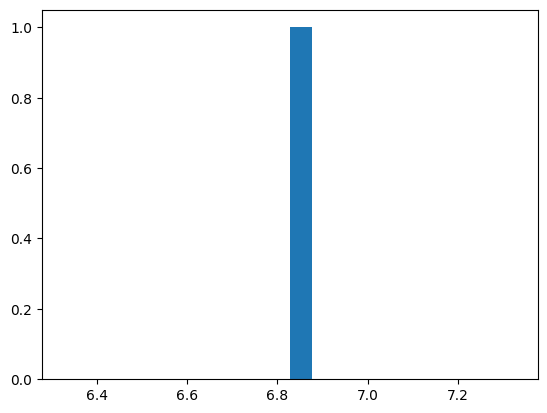

6.827332841759781


In [39]:
dgamma = Gamma(1.2,5)  #shape, scale
x = rand(dgamma,1);
println(mean(x))
hist(x,20);

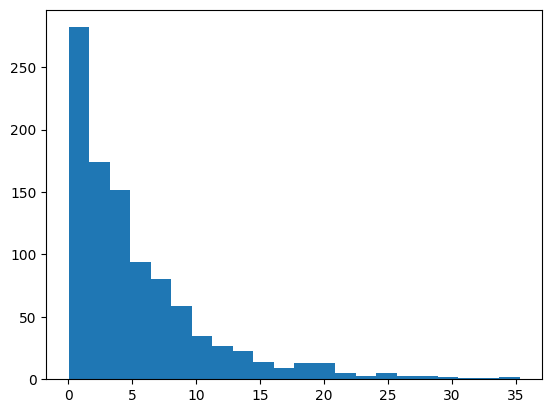

5.374664894554204


In [36]:
derlang = Erlang(1,5)  # integer shape, scale
x = rand(derlang,1000);
println(mean(x))
hist(x,22);